In [1]:
import copy
import time, importlib
import h5py
import pylab as pl, numpy as np, glob, pdb
from numpy import log10 as log
from astropy import units as un, constants as cons
from astropy.cosmology import Planck15 as cosmo
import os
import pandas as pd
import scipy, scipy.ndimage
import tqdm
import unyt

In [2]:
import kalepy as kale

In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as patheffects

In [4]:
import palettable

In [5]:
import linefinder.analyze_data.worldlines as a_worldlines
import linefinder.analyze_data.worldline_set as worldline_set
import linefinder.analyze_data.plot_worldlines as p_worldlines
import linefinder.utils.presentation_constants as p_constants

In [6]:
import linefinder.utils.file_management_new as file_management
import linefinder.config as config

In [7]:
import galaxy_dive.plot_data.plotting as plotting

In [8]:
import coolingFunction

In [9]:
import trove
import verdict
from py2tex import py2tex

In [10]:
%matplotlib inline

# Parameters

In [11]:
pm = dict(
    snum = 600,
    ahf_index = 600,
    
    # Data locations
    tables_dir = '/work2/03057/zhafen/stampede2/CoolingTables/',

    # Constants
    mu = 0.62,
    X = 0.7,
    gamma = 5/3,
    
    # Time analysis parameters
    # If we want to ensure some minimum number of snapshots in the galaxy after accreting
    # (remember to account for the last 10 snapshots with small dt)
    minInd = 30,
#     minInd = -1,
    # t_1e5 bins in Gyr
    t1e5_width = 0.1,
)

In [12]:
pm = trove.link_params_to_config(
    '/home1/03057/zhafen/papers/Hot-Accretion-in-FIRE/analysis/hot_accretion.trove',
    variation = 'm12i_cr',
    **pm
)

In [13]:
snum = pm['snum']

In [14]:
sim_name = pm['variation']

In [15]:
print( sim_name )

m12i_cr


# Load Data

In [16]:
fm = file_management.FileManager( 'hot_halo_physics' )

In [17]:
w = a_worldlines.Worldlines(
    tag = pm['tag'],
    data_dir = pm['data_dir'],
    halo_data_dir = pm['halo_data_dir'],
    ahf_index = pm['ahf_index'],
)

In [18]:
w_plotter = p_worldlines.WorldlinesPlotter( w )

In [19]:
print( w.tag )

hothaloacc


In [20]:
ind = pm['ahf_index'] - snum

# Plot

In [21]:
sample_inds = np.random.choice( np.arange( w.n_particles ), 3 )

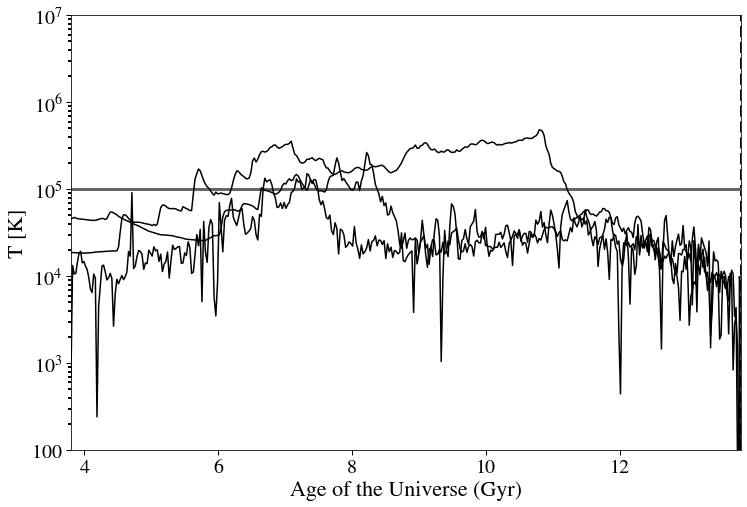

In [22]:
fig = plt.figure( figsize=(12,8) )
ax = plt.gca()

w_plotter.plot_streamlines_vs_time(
    y_key = 'T',
    y_range = [ 1e2, 1e7 ],
    y_label = r'T [K]',
    y_scale = 'log',
    t_start = 13.8,
    t_end = 10.,
    start_ind = 'time_based',
    sample_inds = sample_inds,
    ax = ax,
)

ax.axhline( 1e5, color=pm['background_linecolor'] )

# ax.set_yscale( 'log' )

/home1/03057/zhafen/repos/galaxy-dive/galaxy_dive/analyze_data/simulation_data.py:1168: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.halo_coords = halo_coords_comoving * scale_factor_and_hinv[np.newaxis, :]
/home1/03057/zhafen/repos/galaxy-dive/galaxy_dive/analyze_data/simulation_data.py:1174: UserWarning: cAnalytic not in halo files, skipping r_scale.
  warnings.warn( 'cAnalytic not in halo files, skipping r_scale.' )


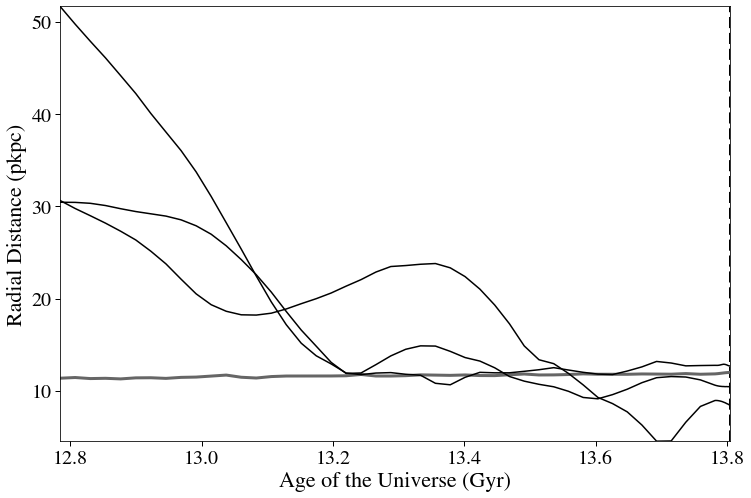

In [23]:
fig = plt.figure( figsize=(12,8) )
ax = plt.gca()

w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
#     y_range = [ 1e2, 1e7 ],
#     y_scale = 'log',
    t_start = 13.8,
    t_end = 1.,
    start_ind = 'time_based',
    sample_inds = sample_inds,
    ax = ax,
)

ax.plot(
    w.get_data( 'time' )[:w.r_gal.size],
    w.r_gal,
    color = pm['background_linecolor'],
)

# ax.set_yscale( 'log' )

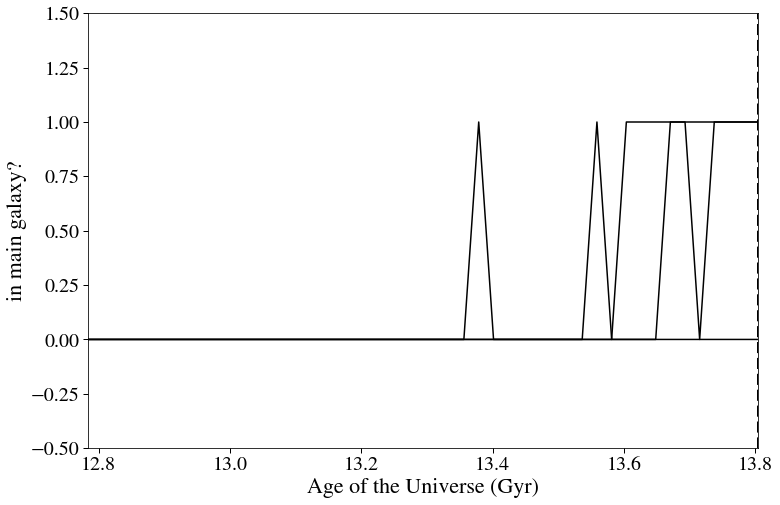

In [24]:
fig = plt.figure( figsize=(12,8) )
ax = plt.gca()

w_plotter.plot_streamlines_vs_time(
    y_key = 'is_in_main_gal',
    y_range = [ -0.5, 1.5 ],
#     y_scale = 'log',
    y_label = r'in main galaxy?',
    t_start = 13.8,
    t_end = 1.,
    start_ind = 'time_based',
    sample_inds = sample_inds,
    ax = ax,
)


# ax.plot(
#     w.get_data( 'time' )[:w.r_gal.size],
#     w.r_gal,
#     color = pm['background_linecolor'],
# )

# ax.set_yscale( 'log' )